In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
battles=pd.read_csv("battles.csv")

In [2]:
battles.info()
battles.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [3]:
pd.set_option('display.max_columns', None)
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [4]:
battles.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
dtype: bool

In [5]:
battles["year"]=battles["year"].astype("object")

In [6]:
battles=battles.drop(battles.columns[[6,7,8,10,11,12,24]],axis=1)

In [7]:
battles["summer"]=battles["summer"].astype("object")
battles["summer"]=battles["summer"].fillna(method="pad",limit=1)

In [8]:
battles["battle_type"].value_counts()
battles["battle_type"]=battles["battle_type"].fillna("pitchced battle")
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     object 
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   defender_1          37 non-null     object 
 7   attacker_outcome    37 non-null     object 
 8   battle_type         38 non-null     object 
 9   major_death         37 non-null     float64
 10  major_capture       37 non-null     float64
 11  attacker_size       24 non-null     float64
 12  defender_size       19 non-null     float64
 13  attacker_commander  37 non-null     object 
 14  defender_commander  28 non-null     object 
 15  summer              38 non-null     float64
 16  location  

### Which year has the most wars? Does summer affect win or not?

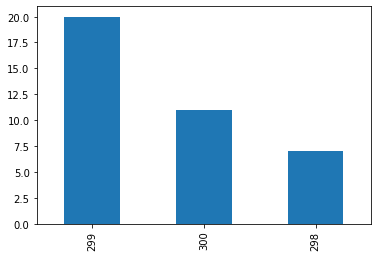

In [9]:
battles["year"].value_counts().plot(kind="bar")

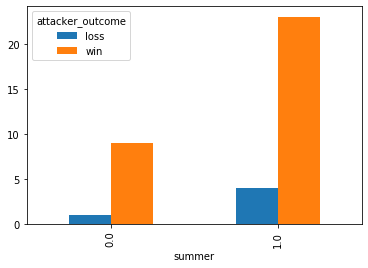

In [10]:
#Summer VS acttacker_outcome
battles.groupby(['attacker_outcome','summer'])['attacker_outcome'].count().unstack(0).plot.bar()

### Who were involved in wars in all this years? 

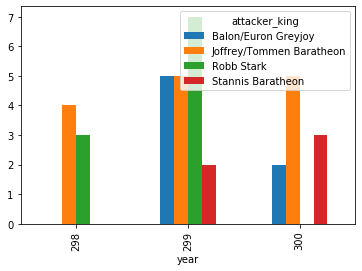

In [11]:
battles.groupby("year").attacker_king.value_counts().unstack().plot(kind="bar")

### Who wins the most wars and in which year?

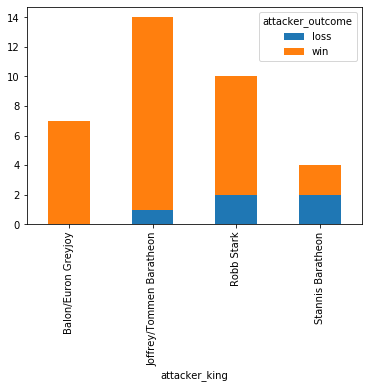

In [12]:
battles.groupby("attacker_king").attacker_outcome.value_counts().unstack().plot(kind="bar",stacked=True)

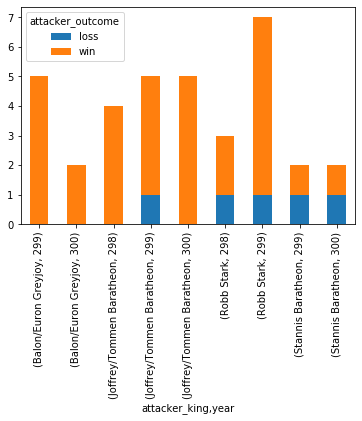

In [16]:
battles.groupby(["attacker_king","year"]).attacker_outcome.value_counts().unstack().plot(kind="bar",stacked=True)

### Where(which region) were the wars happened in all this years? Then,which region has the most wars?Did region affect win or not?

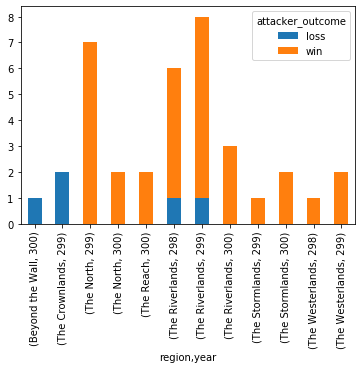

In [17]:
battles.groupby(["region","year"])["attacker_outcome"].value_counts().unstack().plot(kind='bar',stacked=True)

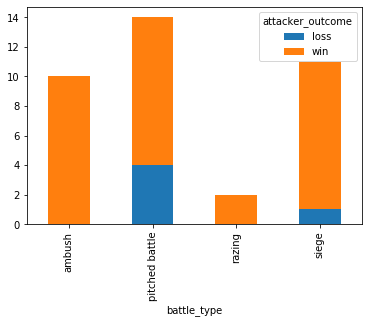

In [19]:
#What type of wars are mainly used in this year? 
#Why this type of wars were used in this year?
#How the type of wars benefit the war outcome?


#Battle_type VS attacker_outcome
battles.groupby("battle_type")['attacker_outcome'].value_counts().unstack().plot.bar(stacked=True)


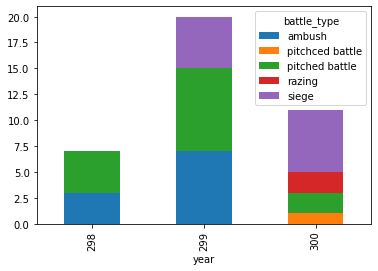

In [23]:
#Battle_type VS Year
battles.groupby("year")['battle_type'].value_counts().unstack().plot.bar(stacked=True)

### Which type of wars did the kings used in each years?

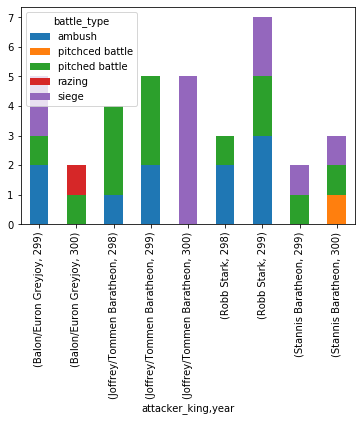

In [24]:
battles.groupby(["attacker_king","year"])["battle_type"].value_counts().unstack().plot.bar(stacked=True)

### How much was the size of each side in each year? Does the size of army effect war outcome?

In [26]:
battles=battles.drop(27)##drop the unnormal value

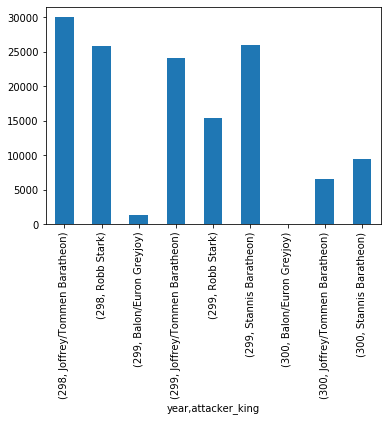

In [27]:
battles.groupby(["year","attacker_king"])["attacker_size"].sum().plot.bar()

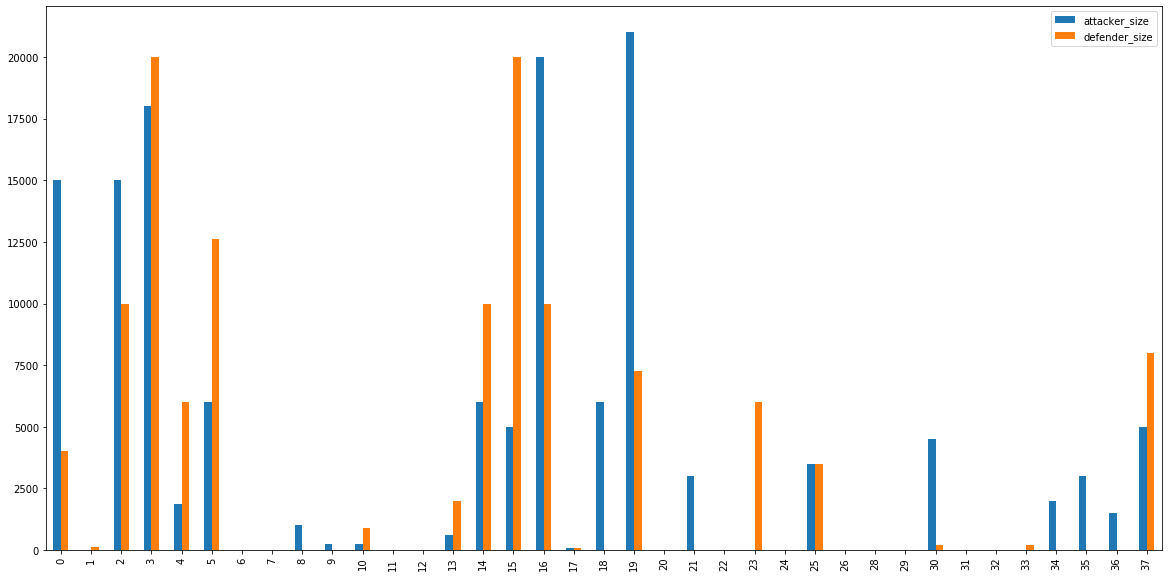

In [28]:
battles[["attacker_size","defender_size"]].plot(kind = "bar",figsize=(20,10))

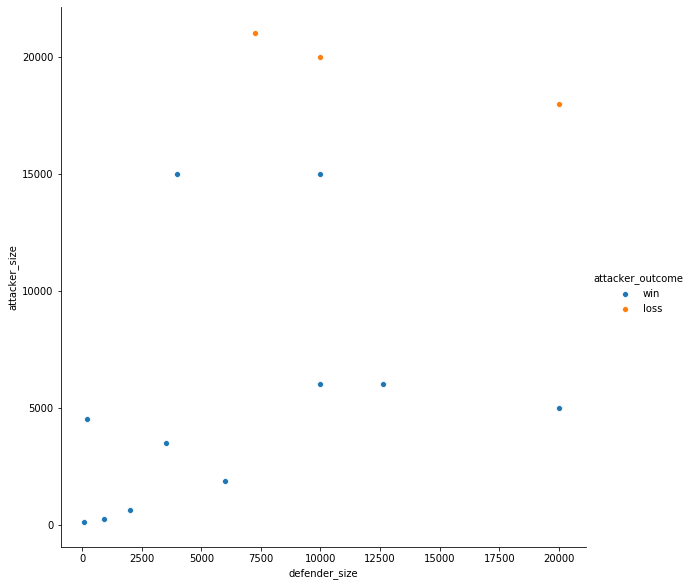

In [34]:
sns.pairplot(x_vars=["defender_size"], y_vars=["attacker_size"], data=battles, hue="attacker_outcome",height=8)

# Conclusion

a. When--The year of 299 have the most wars, when the war happens in summer, the attacker side is more likely to win.

b. Who--All kings have attended the wars in the year of 299. Robb won the most number of wars in that year, 6 in total and claimed king since then. While Joffey attended most wars and won most wars in total, in the year of 300,he never lost any war. Balon, though attended wars from 299, never lost any war.

c. Where--Except the North and Beyond the wall, all regions had wars in the year of 299.Both the Riverlands and the North have the most wars in this year, 7 in total, while in other years, Riverlands had the most wars happened. Also, the region did have some effect on the war outcome. The North,the Stomlands,the Reach and the Westerlands benefit to attackers, while Beyond the Wall and the Crownlands are not good for attackers to conduct their wars.

d. What&Why--Pitched battles are the most frequently used type of wars in the year of 299,the middle of Five King Wars, however, in the latetime of Wars, siege has become the main format of war since the win or loss had been clarified over time.

e. How--Ambush helped attacker won every war, which attacked enemies when they are unsuspecting. Siege and razing were used when it is the late time of wars since the difference of strength between each side has been claried.

f. How much--Stannis had the largest size in the year of 299, then it comes to Joffey and Robb.Also, over the time, the size of each side had been decreasing for the war had been in the final stage. Besides, there's no outstanding relationship between the size of army and the outcome of wars.